<a href="https://colab.research.google.com/github/Mfths/2025_PBO_IFA/blob/main/JOB_2_Visi_Komputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum D1 Memulai Klasifikasi Gambar dengan Dataset Sederhana

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


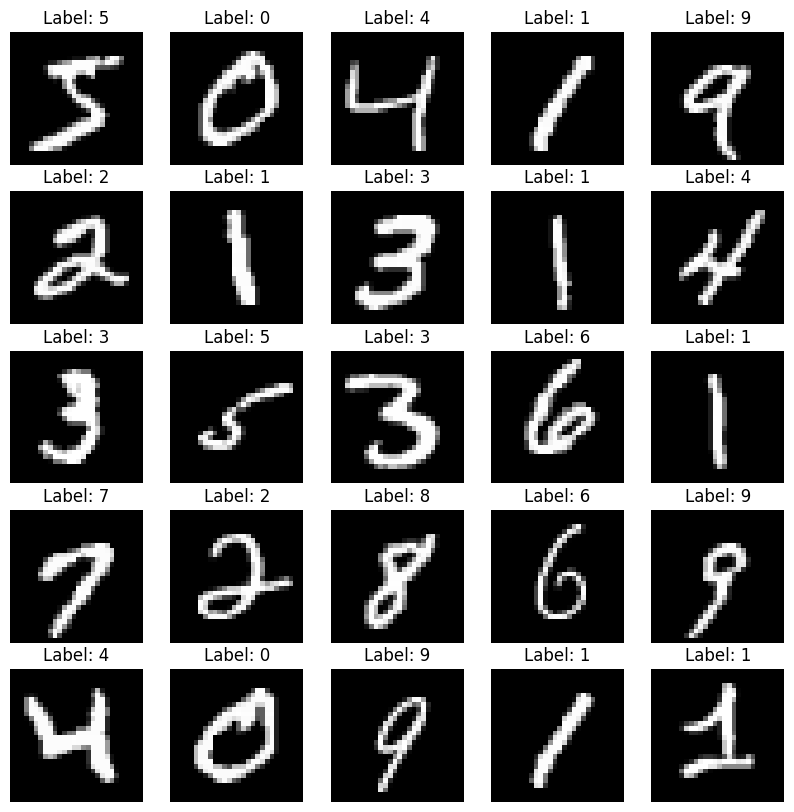

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [21]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


Praktikum D3 – Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.9025 - loss: 0.3344 - val_accuracy: 0.9813 - val_loss: 0.0704
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9813 - loss: 0.0657 - val_accuracy: 0.9847 - val_loss: 0.0528
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9883 - loss: 0.0390 - val_accuracy: 0.9845 - val_loss: 0.0510
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9918 - loss: 0.0273 - val_accuracy: 0.9862 - val_loss: 0.0507
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.9940 - loss: 0.0184 - val_accuracy: 0.9870 - val_loss: 0.0554


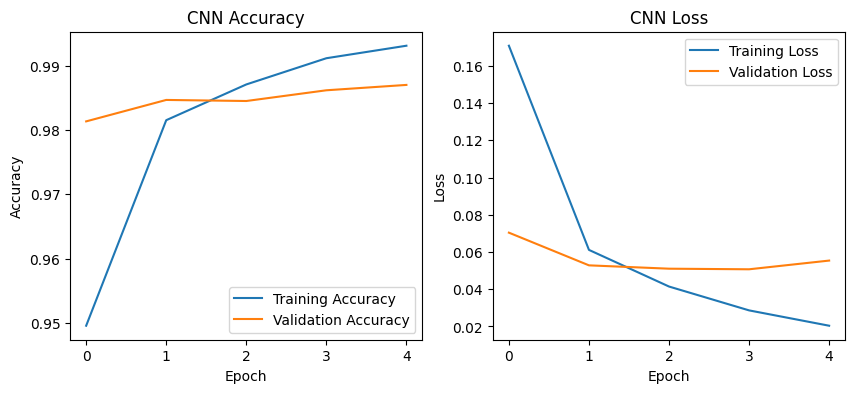

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64, activation='relu'), layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Sesudah di double Conv2D

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.8755 - loss: 0.3969 - val_accuracy: 0.9828 - val_loss: 0.0583
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9834 - loss: 0.0556 - val_accuracy: 0.9855 - val_loss: 0.0455
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9874 - loss: 0.0388 - val_accuracy: 0.9900 - val_loss: 0.0391
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9910 - loss: 0.0282 - val_accuracy: 0.9883 - val_loss: 0.0418
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9930 - loss: 0.0217 - val_accuracy: 0.9907 - val_loss: 0.0379


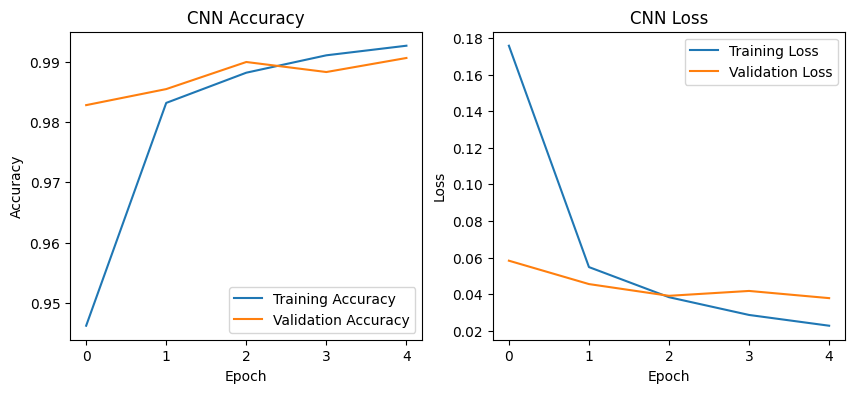

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), layers.MaxPooling2D((2,2)),
layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64, activation='relu'), layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 39ms/step - accuracy: 0.3562 - loss: 1.7424 - val_accuracy: 0.5572 - val_loss: 1.2156
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 50s 36ms/step - accuracy: 0.5854 - loss: 1.1673 - val_accuracy: 0.6346 - val_loss: 1.0546
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.6499 - loss: 1.0066 - val_accuracy: 0.6556 - val_loss: 0.9964
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.6815 - loss: 0.9138 - val_accuracy: 0.6746 - val_loss: 0.9501
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 50s 36ms/step - accuracy: 0.7050 - loss: 0.8452 - val_accuracy: 0.6862 - val_loss: 0.9298
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.7338 - loss: 0.7695 - val_accuracy: 0.7058 - val_loss: 0.8856
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.7521 - loss: 0.7094 - val_accuracy: 0.6962 - val_loss: 0.9024
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.7657 -

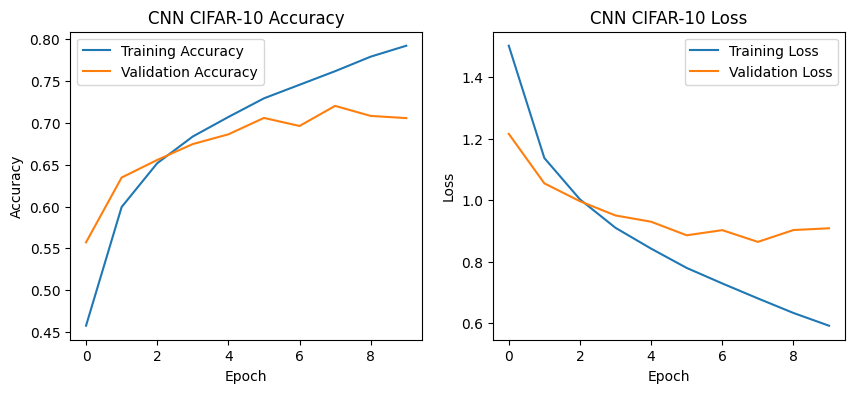

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Setelah ditambahkan Dropout(0.5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 62s 43ms/step - accuracy: 0.2797 - loss: 1.9423 - val_accuracy: 0.5220 - val_loss: 1.3743
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.4649 - loss: 1.4768 - val_accuracy: 0.5942 - val_loss: 1.1684
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.5299 - loss: 1.3046 - val_accuracy: 0.6132 - val_loss: 1.1010
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.5671 - loss: 1.2190 - val_accuracy: 0.6328 - val_loss: 1.0257
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.5885 - loss: 1.1556 - val_accuracy: 0.6612 - val_loss: 0.9581
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 52s 37ms/step - accuracy: 0.6056 - loss: 1.1025 - val_accuracy: 0.6680 - val_loss: 0.9562
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.6238 - loss: 1.0569 - val_accuracy: 0.6814 - val_loss: 0.9261
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.6310 -

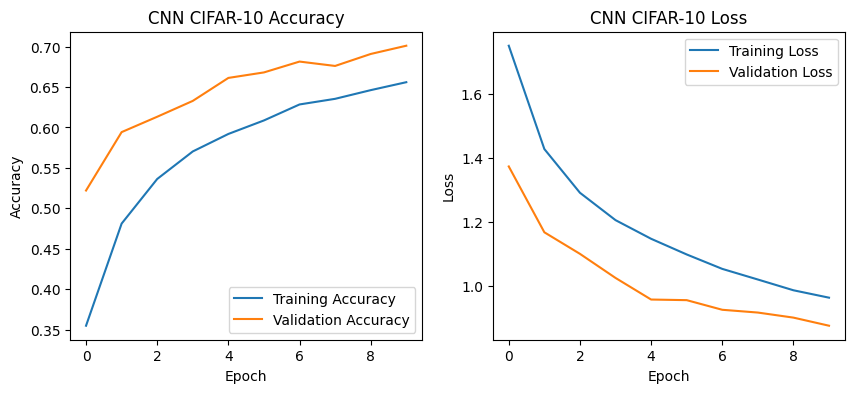

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64, activation='relu'),
Dropout(0.5),
layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Praktikum D5 – Transfer Learning dengan Model Pra-Latih

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 551s 390ms/step - accuracy: 0.4533 - loss: 1.5635 - val_accuracy: 0.5772 - val_loss: 1.2215
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 563s 391ms/step - accuracy: 0.5805 - loss: 1.2041 - val_accuracy: 0.5898 - val_loss: 1.1639
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 527s 366ms/step - accuracy: 0.5961 - loss: 1.1504 - val_accuracy: 0.5926 - val_loss: 1.1516
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 545s 387ms/step - accuracy: 0.6108 - loss: 1.1146 - val_accuracy: 0.6074 - val_loss: 1.1231
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 561s 387ms/step - accuracy: 0.6249 - loss: 1.0700 - val_accuracy: 0.6164 - val_loss: 1.1042


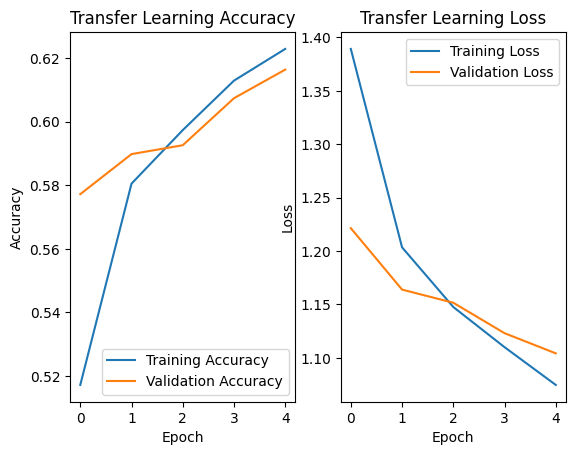

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False,
input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history ===== plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Kode program setelah membuka 1-2 terahir dari  lapisan konvolusional



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 801s 567ms/step - accuracy: 0.5082 - loss: 1.4105 - val_accuracy: 0.6166 - val_loss: 1.1110
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 784s 558ms/step - accuracy: 0.6352 - loss: 1.0444 - val_accuracy: 0.6434 - val_loss: 1.0194
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 791s 550ms/step - accuracy: 0.6597 - loss: 0.9638 - val_accuracy: 0.6560 - val_loss: 0.9982
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 772s 549ms/step - accuracy: 0.6757 - loss: 0.9205 - val_accuracy: 0.6676 - val_loss: 0.9614
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 800s 548ms/step - accuracy: 0.6939 - loss: 0.8656 - val_accuracy: 0.6770 - val_loss: 0.9511


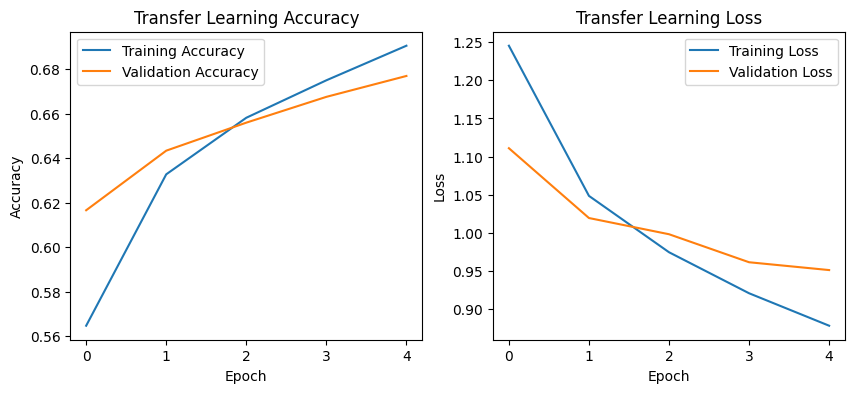

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# ===== Load CIFAR-10 =====
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Untuk Normalisasi ke [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = True

# Untuk membekukan semua layer kecuali 2 terakhir
for layer in base_model.layers[:-2]:
    layer.trainable = False


model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 139s 443ms/step
              precision    recall  f1-score   support

           0       0.79      0.65      0.71      1000
           1       0.72      0.79      0.76      1000
           2       0.59      0.56      0.58      1000
           3       0.52      0.43      0.47      1000
           4       0.56      0.67      0.61      1000
           5       0.51      0.64      0.57      1000
           6       0.72      0.67      0.69      1000
           7       0.72      0.71      0.72      1000
           8       0.81      0.75      0.78      1000
           9       0.72      0.73      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



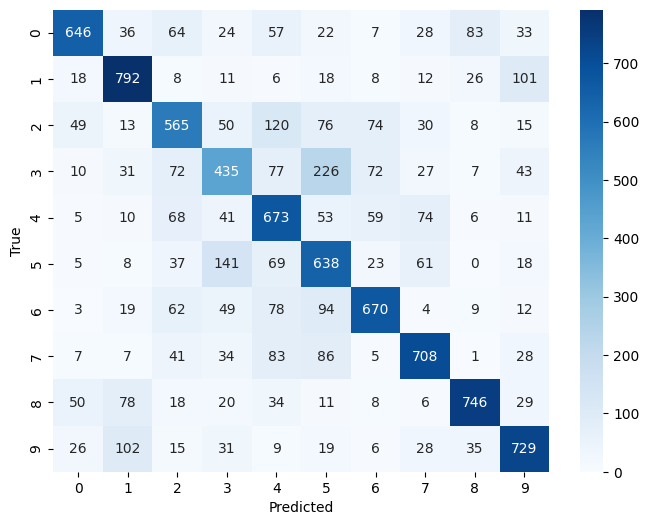

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
